In [1]:
using IntervalSets
using Distributions
using Random, LinearAlgebra, Statistics, Distributions, StatsBase, ArraysOfArrays
using JLD2
using ValueShapes
using TypedTables
using HDF5
using CSV
using BAT
using PyPlot

In [13]:
include("../utill.jl")

corner_plots (generic function with 1 method)

In [3]:
function get_quantile(name; α=0.5)
    outp_tmp = bat_read(name) 
    samples = varshape(prior).(outp_tmp)
    samples_flat, w = flatview(unshaped.(samples.v)), samples.weight
    return[quantile(samples_flat[i,:], Weights(w), α) for i in 1:size(samples_flat)[1]]
end

function get_effss(name)
    outp_tmp = bat_read(name) 
    return bat_eff_sample_size(outp_tmp).result ./ length(outp_tmp)
end

function get_mode(name)
    outp_tmp = bat_read(name) 
    return mode(outp_tmp)
end

get_mode (generic function with 1 method)

In [4]:
param_truth = (
        tr_size = [0.15, 0.15],
        ang_spr = [4.0, 4.0],
        s_waist = [2.9,],
        μ_x = [35,35,20,35], 
        μ_y = [35,35,20,35], 
        σ_x = [0,0,0,0], 
        σ_y = [0,0,0,0], 
        δ_x = [0.0271,0.0216,0.114,3*0.0303], 
        δ_y = [0.0305,0.0234,0.125,3*0.0298],
        int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9],
        s_cam = [0.0, 1.478, 15.026, 23.1150], 
    )

param_truth_flat = vcat([param_truth...]...)

β_min = 0.8
β_max = 1.2

prior = NamedTupleDist(
        tr_size = [β_min*param_truth.tr_size[1]..β_max*param_truth.tr_size[1], β_min*param_truth.tr_size[2]..β_max*param_truth.tr_size[2]],
        ang_spr = [β_min*param_truth.ang_spr[1]..β_max*param_truth.ang_spr[1], β_min*param_truth.ang_spr[2]..β_max*param_truth.ang_spr[2]],
        s_waist = [β_min*param_truth.s_waist[1]..β_max*param_truth.s_waist[1],],
        μ_x = [35,35,20,35], 
        μ_y = [35,35,20,35], 
        σ_x = [0,0,0,0], 
        σ_y = [0,0,0,0], 
        δ_x = [0.0271,0.0216,0.114,3*0.0303], 
        δ_y = [0.0305,0.0234,0.125,3*0.0298],
        int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9],
        s_cam = [0.0, 1.478, 15.026, 23.1150], 
    );

In [5]:
PATH = "../../data/sampling_results/Benchmark-1/"
csvfile = CSV.File(PATH*"sim_event-1-table.csv")
tt = Table(csvfile)

names = PATH.*tt.name.*".hdf5"

summary_1 = Table(
    ind = [i for i in Base.OneTo(length(names))],
    q_med = [get_quantile(i) for i in names],
    q_low = [get_quantile(i, α=0.01) for i in names],
    q_high = [get_quantile(i, α=0.99) for i in names],
    effss = [get_effss(i) for i in names],
    mode = [get_mode(i) for i in names],
    time = [i for i in tt.time],
    path = [i for i in names]
)

Table with 8 columns and 5 rows:
     ind  q_med                 q_low                 q_high                ⋯
   ┌─────────────────────────────────────────────────────────────────────────
 1 │ 1    [0.151063, 0.151396…  [0.149955, 0.15026,…  [0.152083, 0.152523…  ⋯
 2 │ 2    [0.151464, 0.151466…  [0.150483, 0.150587…  [0.152177, 0.152151…  ⋯
 3 │ 3    [0.151143, 0.151629…  [0.150154, 0.150346…  [0.151944, 0.152476…  ⋯
 4 │ 4    [0.151016, 0.151415…  [0.150097, 0.150538…  [0.151949, 0.152211…  ⋯
 5 │ 5    [0.152145, 0.151624…  [0.150852, 0.150458…  [0.153277, 0.152606…  ⋯

In [6]:
PATH = "../../data/sampling_results/Benchmark-1/"
csvfile = CSV.File(PATH*"sim_event-2-table.csv")
tt = Table(csvfile)

names = PATH.*tt.name.*".hdf5"

summary_2 = Table(
    ind = [i for i in Base.OneTo(length(names))],
    q_med = [get_quantile(i) for i in names],
    q_low = [get_quantile(i, α=0.01) for i in names],
    q_high = [get_quantile(i, α=0.99) for i in names],
    effss = [get_effss(i) for i in names],
    mode = [get_mode(i) for i in names],
    time = [i for i in tt.time],
    path = [i for i in names]
)

Table with 8 columns and 5 rows:
     ind  q_med                 q_low                 q_high                ⋯
   ┌─────────────────────────────────────────────────────────────────────────
 1 │ 1    [0.150969, 0.151251…  [0.149932, 0.150226…  [0.15202, 0.152409,…  ⋯
 2 │ 2    [0.151399, 0.15138,…  [0.150431, 0.150459…  [0.152269, 0.152293…  ⋯
 3 │ 3    [0.151174, 0.151626…  [0.150221, 0.150438…  [0.152032, 0.152535…  ⋯
 4 │ 4    [0.151105, 0.15146,…  [0.150082, 0.150398…  [0.152034, 0.152362…  ⋯
 5 │ 5    [0.15212, 0.151582,…  [0.151035, 0.150473…  [0.153206, 0.152661…  ⋯

In [7]:
PATH = "../../data/sampling_results/Benchmark-1/"
csvfile = CSV.File(PATH*"sim_event-3-table.csv")
tt = Table(csvfile)

names = PATH.*tt.name.*".hdf5"

summary_3 = Table(
    ind = [i for i in Base.OneTo(length(names))],
    q_med = [get_quantile(i) for i in names],
    q_low = [get_quantile(i, α=0.01) for i in names],
    q_high = [get_quantile(i, α=0.99) for i in names],
    effss = [get_effss(i) for i in names],
    mode = [get_mode(i) for i in names],
    time = [i for i in tt.time],
    path = [i for i in names]
)

Table with 8 columns and 5 rows:
     ind  q_med                 q_low                 q_high                ⋯
   ┌─────────────────────────────────────────────────────────────────────────
 1 │ 1    [0.150963, 0.151257…  [0.149901, 0.150237…  [0.152004, 0.15241,…  ⋯
 2 │ 2    [0.151404, 0.15136,…  [0.150432, 0.150416…  [0.152251, 0.152235…  ⋯
 3 │ 3    [0.151124, 0.151634…  [0.150117, 0.150403…  [0.152002, 0.152541…  ⋯
 4 │ 4    [0.151121, 0.151488…  [0.150051, 0.15039,…  [0.152099, 0.152379…  ⋯
 5 │ 5    [0.152199, 0.151673…  [0.151076, 0.150541…  [0.153232, 0.152652…  ⋯

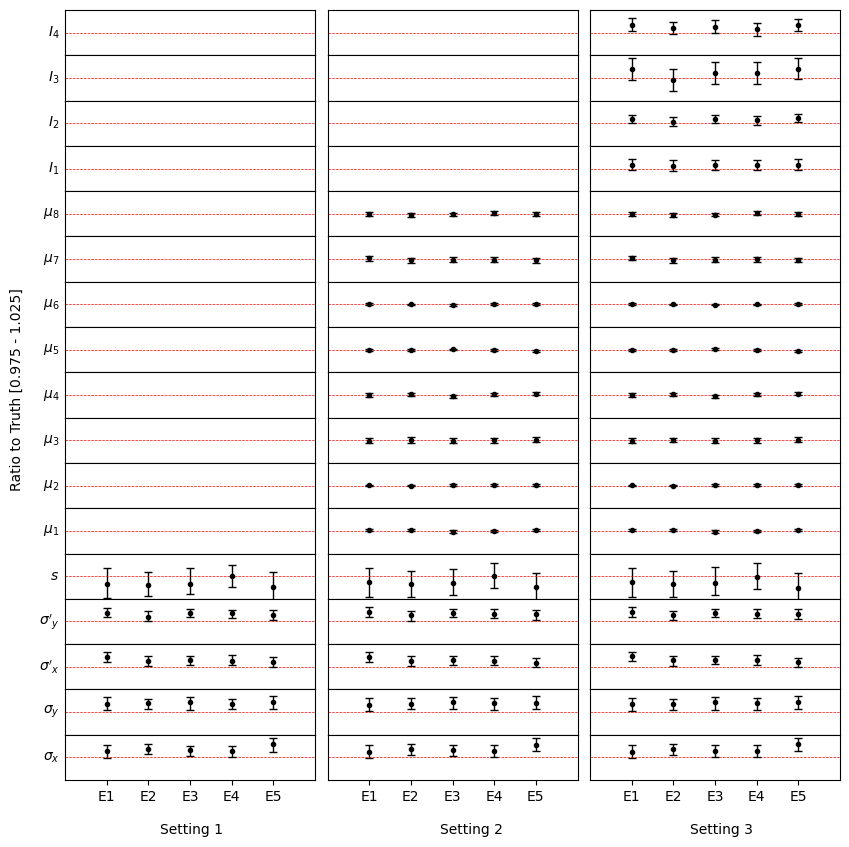

PyObject Text(0.75, 0.06, 'Setting 3')

In [8]:
n_params = 17
param_ind = 1:17
param_labels = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", L"s", L"\mu_1", L"\mu_2", L"\mu_3", L"\mu_4", L"\mu_5", L"\mu_6", L"\mu_7", L"\mu_8", L"I_1", L"I_2", L"I_3", L"I_4"]

event_ind=1:5
event_lab = ["E1", "E2", "E3", "E4", "E5"] 

fig, ax = plt.subplots(n_params,3, figsize=(10,10), sharey=true, sharex=true)
fig.subplots_adjust(hspace=0.0, wspace=0.05)

for i in 1:n_params
    ax[i, 1].axhline([1], linestyle="--", color="red", alpha=1, lw=0.5)
    ax[i, 2].axhline([1], linestyle="--", color="red", alpha=1, lw=0.5)
    ax[i, 3].axhline([1], linestyle="--", color="red", alpha=1, lw=0.5)
    ax[i, 1].set_ylabel(param_labels[18-i], rotation=0, ha="right", va="center")
end

# run 1 
for i in 1:5
    q_med = summary_1.q_med[i]
    q_low = summary_1.q_low[i]
    q_high = summary_1.q_high[i]
    
    for j in Base.OneTo(length(q_med))
    
        q_med_run = q_med[j] / param_truth_flat[j]
        q_low_run = q_low[j] / param_truth_flat[j]
        q_high_run = q_high[j] / param_truth_flat[j]
        
         ax[18 - j, 1].errorbar([i], [q_med_run], yerr=[[q_med_run - q_low_run], [q_high_run - q_med_run]], fmt=".", color="k", ecolor="k", capthick=1, capsize=3, linewidth=1)
    end
end

# run 2 
for i in 1:5
    q_med = summary_2.q_med[i]
    q_low = summary_2.q_low[i]
    q_high = summary_2.q_high[i]
    
    for j in Base.OneTo(length(q_med))
    
        q_med_run = q_med[j] / param_truth_flat[j]
        q_low_run = q_low[j] / param_truth_flat[j]
        q_high_run = q_high[j] / param_truth_flat[j]
        
         ax[18 - j, 2].errorbar([i], [q_med_run], yerr=[[q_med_run - q_low_run], [q_high_run - q_med_run]], fmt=".", color="k", ecolor="k", capthick=1, capsize=3, linewidth=1)
    end
end

# run 3 
for i in 1:5
    q_med = summary_3.q_med[i]
    q_low = summary_3.q_low[i]
    q_high = summary_3.q_high[i]
    
    for j in Base.OneTo(length(q_med))
        
        if j < 14
            q_med_run = q_med[j] / param_truth_flat[j]
            q_low_run = q_low[j] / param_truth_flat[j]
            q_high_run = q_high[j] / param_truth_flat[j]
            ax[18 - j, 3].errorbar([i], [q_med_run], yerr=[[q_med_run - q_low_run], [q_high_run - q_med_run]], fmt=".", color="k", ecolor="k", capthick=1, capsize=3, linewidth=1)
        else 
            q_med_run = q_med[j] / param_truth_flat[j+16]
            q_low_run = q_low[j] / param_truth_flat[j+16]
            q_high_run = q_high[j] / param_truth_flat[j+16]
            ax[18 - j, 3].errorbar([i], [q_med_run], yerr=[[q_med_run - q_low_run], [q_high_run - q_med_run]], fmt=".", color="k", ecolor="k", capthick=1, capsize=3, linewidth=1)
        end
    end
end

ax[1].set_xticks(event_ind)
ax[1].set_xticklabels(event_lab)

ax[1].set_yticklabels([])
ax[1].set_yticks([])

ax[1].set_ylim(0.975, 1.025)
ax[1].set_xlim(0, 6)


fig.text(0.07, 0.5, "Ratio to Truth [0.975 - 1.025]", va="center", rotation="vertical")
fig.text(0.22, 0.06, "Setting 1", va="center", rotation="horizontal")
fig.text(0.5, 0.06, "Setting 2", va="center", rotation="horizontal")
fig.text(0.75, 0.06, "Setting 3", va="center", rotation="horizontal")

In [9]:
# run 1 
data_1 = zeros(17, 5)
data_1 .= NaN
data_1_2 = zeros(17, 5)
data_1_2 .= NaN
data_1_3 = zeros(17, 5)
data_1_3 .= NaN
for i in 1:5
    q_med = summary_1.q_med[i]
    q_low = summary_1.q_low[i]
    q_high = summary_1.q_high[i]
    mode = summary_1.mode[i]
    for j in Base.OneTo(length(q_med))
    
        q_med_run = q_med[j] / param_truth_flat[j]
        q_low_run = q_low[j] / param_truth_flat[j]
        q_high_run = q_high[j] / param_truth_flat[j]
        mode_run = mode[j] / param_truth_flat[j]
        data_1_2[18 - j, i] = q_high_run - q_low_run
        data_1[18 - j, i] = q_med_run
        data_1_3[18 - j, i] = mode_run
    end
end


# run 2 
data_2 = zeros(17, 5)
data_2 .= NaN
data_2_2 = zeros(17, 5)
data_2_2 .= NaN
data_2_3 = zeros(17, 5)
data_2_3 .= NaN
for i in 1:5
    q_med = summary_2.q_med[i]
    q_low = summary_2.q_low[i]
    q_high = summary_2.q_high[i]
    mode = summary_2.mode[i]
    for j in Base.OneTo(length(q_med))
    
        q_med_run = q_med[j] / param_truth_flat[j]
        q_low_run = q_low[j] / param_truth_flat[j]
        q_high_run = q_high[j] / param_truth_flat[j]
        mode_run = mode[j] / param_truth_flat[j]
        data_2_2[18 - j, i] = q_high_run - q_low_run
        data_2[18 - j, i] = q_med_run
        data_2_3[18 - j, i] = mode_run
    end
end

# run 3 
data_3 = rand(17, 5);
data_3 .= NaN
data_3_2 = rand(17, 5);
data_3_2 .= NaN
data_3_3 = zeros(17, 5)
data_3_3 .= NaN
for i in 1:5
    q_med = summary_3.q_med[i]
    q_low = summary_3.q_low[i]
    q_high = summary_3.q_high[i]
    mode = summary_3.mode[i]
    for j in Base.OneTo(length(q_med))
        if j < 14
            q_med_run = q_med[j] / param_truth_flat[j]
            q_low_run = q_low[j] / param_truth_flat[j]
            q_high_run = q_high[j] / param_truth_flat[j]
            mode_run = mode[j] / param_truth_flat[j]
            data_3[18 - j, i] = q_med_run
            data_3_2[18 - j, i] = q_high_run - q_low_run
            data_3_3[18 - j, i] = mode_run
        else 
            q_med_run = q_med[j] / param_truth_flat[j+16]
            q_low_run = q_low[j] / param_truth_flat[j+16]
            q_high_run = q_high[j] / param_truth_flat[j+16]
            mode_run = mode[j] / param_truth_flat[j+16]
            data_3_2[18 - j, i] = q_high_run - q_low_run
            data_3[18 - j, i] = q_med_run
            data_3_3[18 - j, i] = mode_run
        end
    end
end



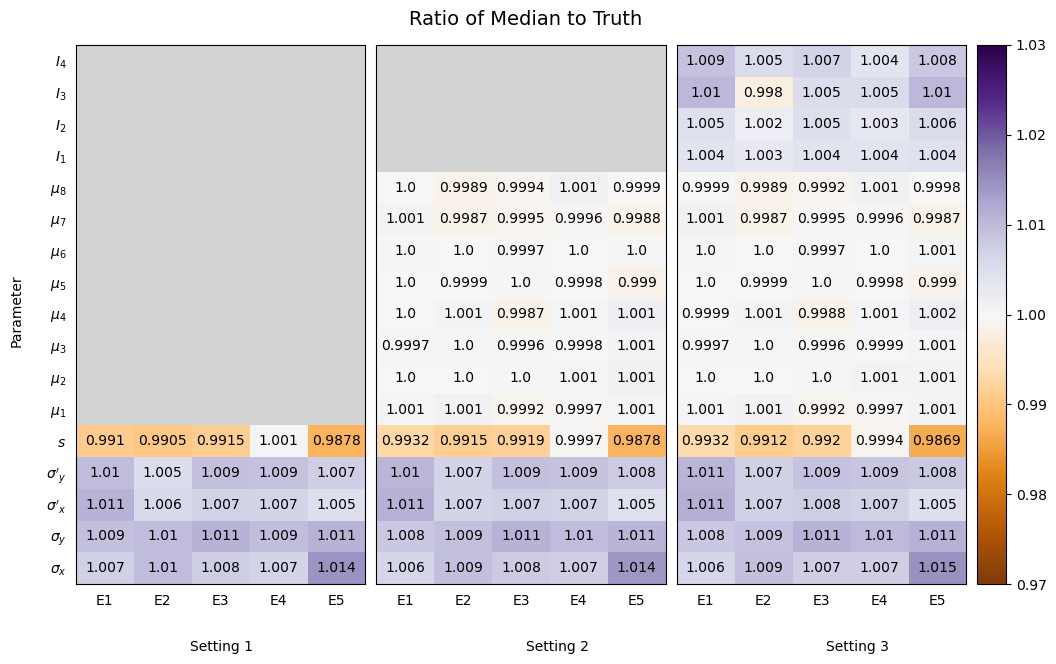

PyObject Text(0.5, 0.93, 'Ratio of Median to Truth')

In [10]:
fig, (ax1, ax2, ax3, cb) = plt.subplots(1,4, figsize=(12,7), gridspec_kw=Dict("width_ratios"=>[1,1,1,0.1]) )

fig.subplots_adjust(hspace=0.0, wspace=0.05)

vmin, vmax = 0.97, 1.03

cmap = matplotlib.cm.PuOr
cmap.set_bad("lightgray",1.)

# cmap = "RdBu"

im = ax1.imshow(data_1, aspect="auto",  vmin=vmin, vmax=vmax, cmap=cmap)

for i in 1:5
    for j in 1:5
        text = ax1.text(j-1, 17-i, round(data_1[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end

for i in 1:13
    for j in 1:5
        text = ax2.text(j-1, 17-i, round(data_2[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end

for i in 1:17
    for j in 1:5
        text = ax3.text(j-1, 17-i, round(data_3[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end


im = ax2.imshow(data_2, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

im = ax3.imshow(data_3, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

fig.colorbar(im, cax=cb)


ax1.set_yticks(param_ind .-1 )
ax1.xaxis.set_ticks_position("none") 
ax1.yaxis.set_ticks_position("none") 
ax1.set_yticklabels(param_labels[end:-1:1])

ax1.set_xticks(event_ind .- 1)
ax1.set_xticklabels(event_lab)

ax2.set_xticks(event_ind .- 1)
ax2.set_xticklabels(event_lab)
ax2.set_yticklabels([])
ax2.xaxis.set_ticks_position("none") 
ax2.yaxis.set_ticks_position("none") 

ax3.set_xticks(event_ind .- 1)
ax3.set_xticklabels(event_lab)
ax3.set_yticklabels([])
ax3.xaxis.set_ticks_position("none") 
ax3.yaxis.set_ticks_position("none") 

fig.text(0.07, 0.5, "Parameter", va="center", rotation="vertical")
fig.text(0.22, 0.02, "Setting 1", va="center", rotation="horizontal")
fig.text(0.5, 0.02, "Setting 2", va="center", rotation="horizontal")
fig.text(0.75, 0.02, "Setting 3", va="center", rotation="horizontal")

fig.suptitle("Ratio of Median to Truth", y = 0.93, fontsize=14)

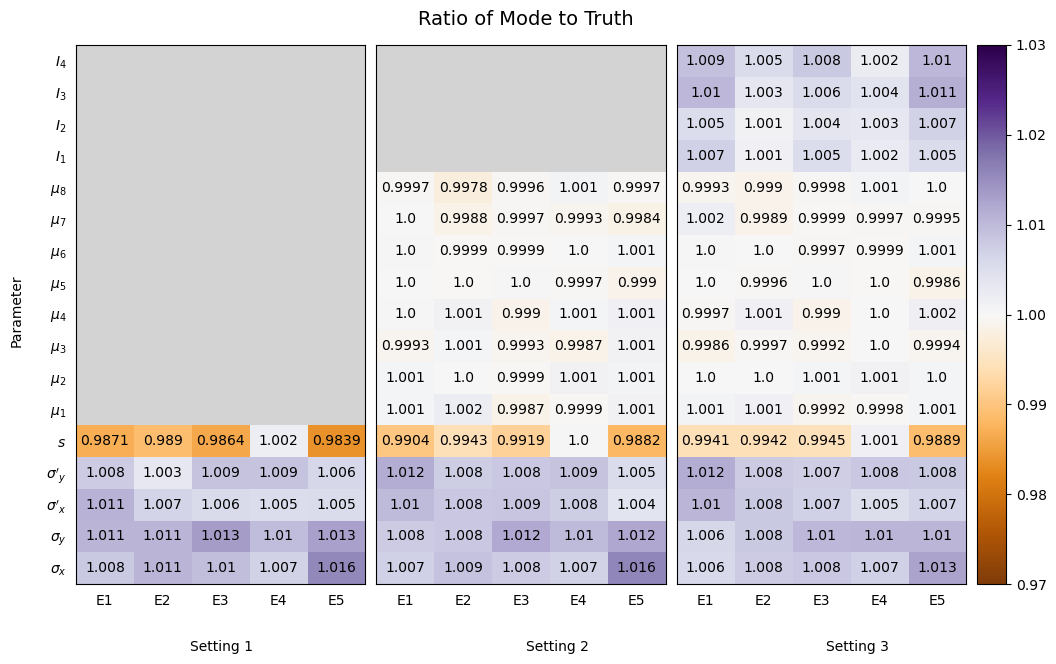

PyObject Text(0.5, 0.93, 'Ratio of Mode to Truth')

In [11]:
fig, (ax1, ax2, ax3, cb) = plt.subplots(1,4, figsize=(12,7), gridspec_kw=Dict("width_ratios"=>[1,1,1,0.1]) )

fig.subplots_adjust(hspace=0.0, wspace=0.05)

vmin, vmax = 0.97, 1.03

cmap = matplotlib.cm.PuOr
cmap.set_bad("lightgray",1.)

# cmap = "RdBu"

im = ax1.imshow(data_1_3, aspect="auto",  vmin=vmin, vmax=vmax, cmap=cmap)

for i in 1:5
    for j in 1:5
        text = ax1.text(j-1, 17-i, round(data_1_3[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end

for i in 1:13
    for j in 1:5
        text = ax2.text(j-1, 17-i, round(data_2_3[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end

for i in 1:17
    for j in 1:5
        text = ax3.text(j-1, 17-i, round(data_3_3[18-i, j], sigdigits=4),
                       ha="center", va="center", color="k")
    end
end


im = ax2.imshow(data_2_3, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

im = ax3.imshow(data_3_3, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

fig.colorbar(im, cax=cb)


ax1.set_yticks(param_ind .-1 )
ax1.xaxis.set_ticks_position("none") 
ax1.yaxis.set_ticks_position("none") 
ax1.set_yticklabels(param_labels[end:-1:1])

ax1.set_xticks(event_ind .- 1)
ax1.set_xticklabels(event_lab)

ax2.set_xticks(event_ind .- 1)
ax2.set_xticklabels(event_lab)
ax2.set_yticklabels([])
ax2.xaxis.set_ticks_position("none") 
ax2.yaxis.set_ticks_position("none") 

ax3.set_xticks(event_ind .- 1)
ax3.set_xticklabels(event_lab)
ax3.set_yticklabels([])
ax3.xaxis.set_ticks_position("none") 
ax3.yaxis.set_ticks_position("none") 

fig.text(0.07, 0.5, "Parameter", va="center", rotation="vertical")
fig.text(0.22, 0.02, "Setting 1", va="center", rotation="horizontal")
fig.text(0.5, 0.02, "Setting 2", va="center", rotation="horizontal")
fig.text(0.75, 0.02, "Setting 3", va="center", rotation="horizontal")

fig.suptitle("Ratio of Mode to Truth", y = 0.93, fontsize=14)

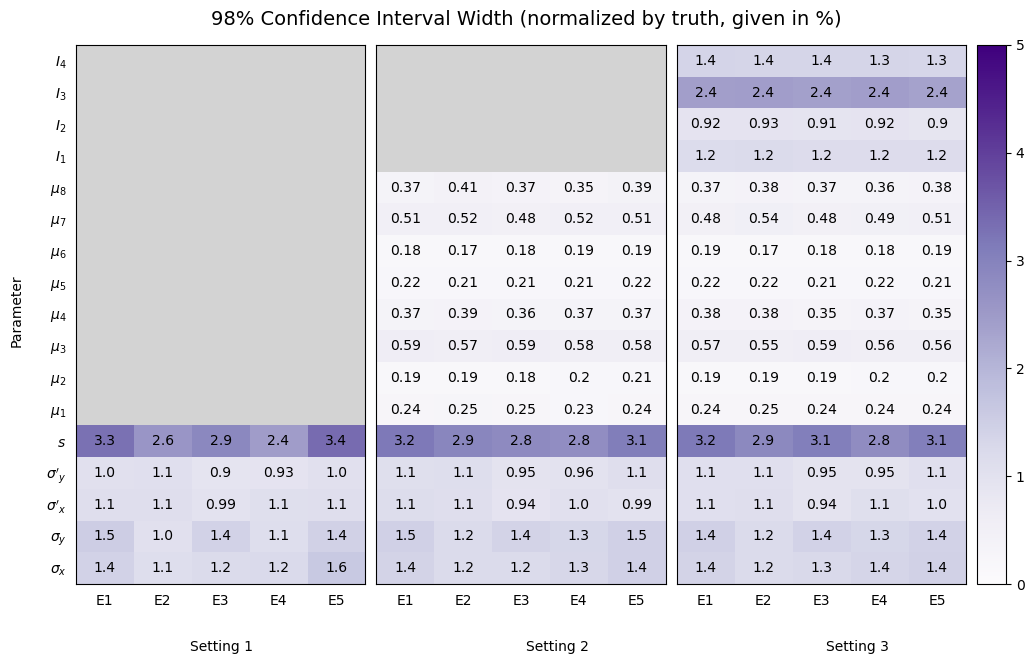

PyObject Text(0.5, 0.93, '98% Confidence Interval Width (normalized by truth, given in %)')

In [12]:
fig, (ax1, ax2, ax3, cb) = plt.subplots(1,4, figsize=(12,7), gridspec_kw=Dict("width_ratios"=>[1,1,1,0.1]) )

fig.subplots_adjust(hspace=0.0, wspace=0.05)

vmin, vmax = 0., 5

cmap = matplotlib.cm.Purples
cmap.set_bad("lightgray",1.)

# cmap = "RdBu"

im = ax1.imshow(100 .* data_1_2, aspect="auto",  vmin=vmin, vmax=vmax, cmap=cmap)

for i in 1:5
    for j in 1:5
        text = ax1.text(j-1, 17-i, round(data_1_2[18-i, j]*100, sigdigits=2),
                       ha="center", va="center", color="k")
    end
end

for i in 1:13
    for j in 1:5
        text = ax2.text(j-1, 17-i, round(data_2_2[18-i, j]*100, sigdigits=2),
                       ha="center", va="center", color="k")
    end
end

for i in 1:17
    for j in 1:5
        text = ax3.text(j-1, 17-i, round(data_3_2[18-i, j]*100, sigdigits=2),
                       ha="center", va="center", color="k")
    end
end


im = ax2.imshow(100 .* data_2_2, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

im = ax3.imshow(100 .* data_3_2, aspect="auto", vmin=vmin, vmax=vmax, cmap=cmap)

fig.colorbar(im, cax=cb)


ax1.set_yticks(param_ind .-1 )
ax1.xaxis.set_ticks_position("none") 
ax1.yaxis.set_ticks_position("none") 
ax1.set_yticklabels(param_labels[end:-1:1])

ax1.set_xticks(event_ind .- 1)
ax1.set_xticklabels(event_lab)

ax2.set_xticks(event_ind .- 1)
ax2.set_xticklabels(event_lab)
ax2.set_yticklabels([])
ax2.xaxis.set_ticks_position("none") 
ax2.yaxis.set_ticks_position("none") 

ax3.set_xticks(event_ind .- 1)
ax3.set_xticklabels(event_lab)
ax3.set_yticklabels([])
ax3.xaxis.set_ticks_position("none") 
ax3.yaxis.set_ticks_position("none") 

fig.text(0.07, 0.5, "Parameter", va="center", rotation="vertical")
fig.text(0.22, 0.02, "Setting 1", va="center", rotation="horizontal")
fig.text(0.5, 0.02, "Setting 2", va="center", rotation="horizontal")
fig.text(0.75, 0.02, "Setting 3", va="center", rotation="horizontal")

fig.suptitle("98% Confidence Interval Width (normalized by truth, given in %)", y = 0.93, fontsize=14)

In [16]:
outp_tmp = bat_read(names[1]) 
samples = varshape(prior).(outp_tmp);

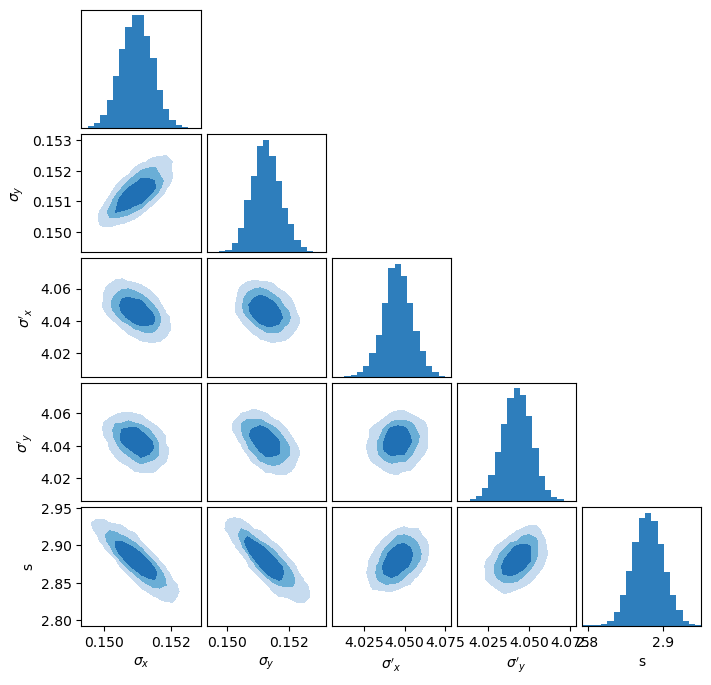

In [22]:
dims = [1,2,3,4,5,]
names = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", "s", "6", "7", "8", "9"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (8,8)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

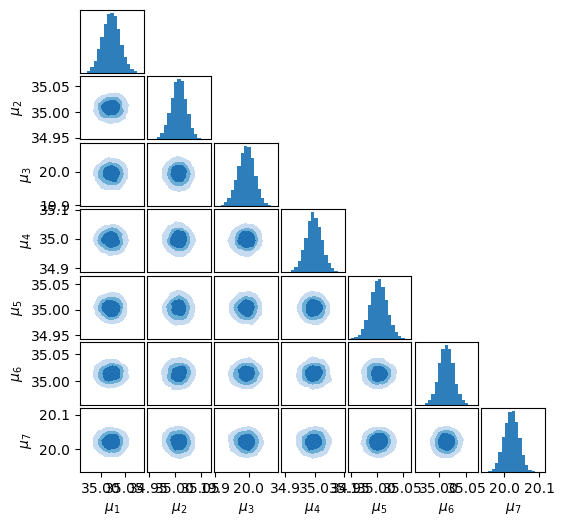

In [30]:
dims = [6,7,8,9,10,11,12]
names = [L"\mu_1", L"\mu_2", L"\mu_3", L"\mu_4", L"\mu_5", L"\mu_6", L"\mu_7", L"\mu_8",]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

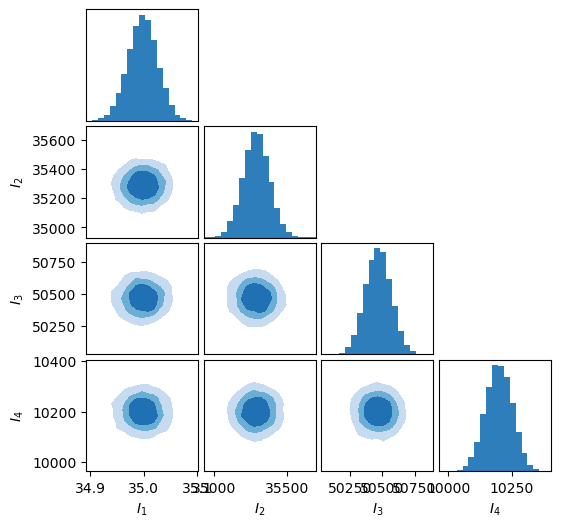

In [31]:
dims = [13, 14, 15, 16]
names = [L"I_1", L"I_2", L"I_3", L"I_4"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)